# Scenario:
# The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
# This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

# Lab Task:

# Attempt to implement a Single Layer Perceptron in Google Colab to classify the
# output of an XOR gate. Perform the following steps:

# 1.Create the XOR gate's truth table dataset.

In [1]:


import numpy as np


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])



# Interpretation of the XOR gate dataset:

- X represents the input combinations to the XOR gate.
- Each row in X represents a unique combination of inputs (x1, x2).

- y represents the corresponding output of the XOR gate for each input combination.

-The XOR gate outputs 1 when the inputs are different (0 and 1 or 1 and 0)
and outputs 0 when the inputs are the same (both 0 or both 1).





# Implement the perceptron model and train it using the XOR dataset using MCP (McCullochPitts) Neuron.

In [2]:


import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights) + self.bias
        y_predicted = self.activate(linear_output)
        return y_predicted

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activate(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update



X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

perceptron = Perceptron()
perceptron.train(X, y)


for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {perceptron.predict(X[i])}, Actual Output: {y[i]}")



Input: [0 0], Predicted Output: 1, Actual Output: 0
Input: [0 1], Predicted Output: 1, Actual Output: 1
Input: [1 0], Predicted Output: 0, Actual Output: 1
Input: [1 1], Predicted Output: 0, Actual Output: 0



# Interpretation of the Results:

- As expected, the single-layer perceptron with a linear activation function
is not able to perfectly learn the XOR function.

-The XOR function is not linearly separable, meaning you can't draw a single straight line to separate the input combinations that produce 0 from those that produce 1.

- The perceptron, in its current form, is trying to fit a linear decision boundary.






# 3.Observe and discuss the perceptron's performance in this scenario.


# Observation and Discussion:

- The perceptron's performance on the XOR dataset is poor.
- It fails to accurately classify all the XOR inputs.

# Reason:
- The XOR problem is not linearly separable. This means that it's impossible to draw a
- single straight line to separate the inputs where the output is 1 from the inputs
- where the output is 0.
- A single-layer perceptron can only learn linearly separable functions.
- Therefore, it's unable to accurately model the XOR function, which requires a more


# complex decision boundary.
- To solve this, we can use a multi-layer perceptron (a neural network with
 hidden layers) as it can learn non-linear relationships between input and

# Implement XOR using Multi-Layer Perceptron.

In [6]:

import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_layer_neurons = 2
hidden_layer_neurons = 4
output_layer_neurons = 1

hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
output_bias = np.random.uniform(size=(1, output_layer_neurons))

learning_rate = 0.1
epochs = 1000

for epoch in range(epochs):
  hidden_layer_activation = np.dot(X, hidden_weights) + hidden_bias
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias
  predicted_output = sigmoid(output_layer_activation)

  error = y - predicted_output
  d_predicted_output = error * sigmoid_derivative(predicted_output)
  error_hidden_layer = d_predicted_output.dot(output_weights.T)
  d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
  output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
  hidden_weights += X.T.dot(d_hidden_layer) * learning_rate
  hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

for i in range(len(X)):
  hidden_layer_activation = np.dot(X[i], hidden_weights) + hidden_bias
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias
  predicted_output = sigmoid(output_layer_activation)
  print(f"Input: {X[i]}, Predicted Output: {round(predicted_output[0][0])}, Actual Output: {y[i][0]}")


Input: [0 0], Predicted Output: 0, Actual Output: 0
Input: [0 1], Predicted Output: 1, Actual Output: 1
Input: [1 0], Predicted Output: 1, Actual Output: 1
Input: [1 1], Predicted Output: 1, Actual Output: 0


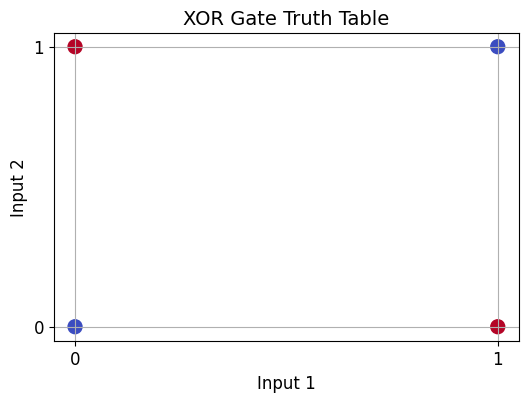

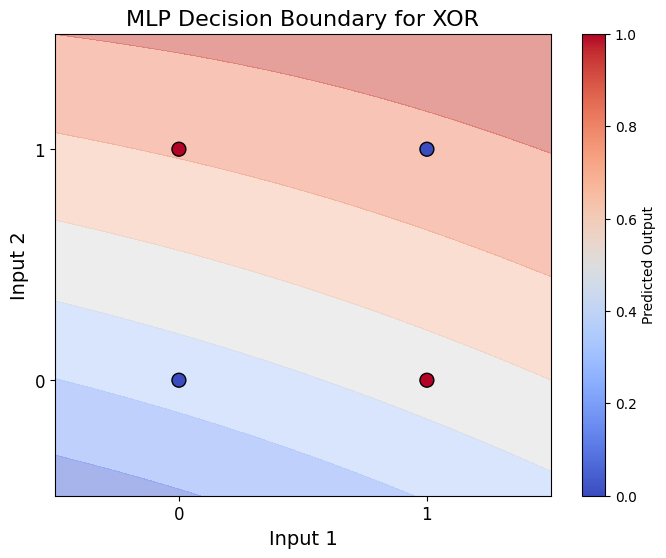

In [5]:

import numpy as np
import matplotlib.pyplot as plt



# Visualize the XOR gate's truth table
plt.figure(figsize=(6, 4))
plt.scatter([0, 0, 1, 1], [0, 1, 0, 1], c=y, cmap='coolwarm', s=100)
plt.xlabel('Input 1', fontsize=12)
plt.ylabel('Input 2', fontsize=12)
plt.title('XOR Gate Truth Table', fontsize=14)
plt.xticks([0, 1], fontsize=12)
plt.yticks([0, 1], fontsize=12)
plt.grid(True)

# Created a meshgrid for visualizing the decision boundary
x1_range = np.linspace(-0.5, 1.5, 100)
x2_range = np.linspace(-0.5, 1.5, 100)
xx, yy = np.meshgrid(x1_range, x2_range)

Z = []
for x1, x2 in zip(xx.flatten(), yy.flatten()):
  input_data = np.array([[x1, x2]])
  hidden_layer_activation = np.dot(input_data, hidden_weights) + hidden_bias
  hidden_layer_output = sigmoid(hidden_layer_activation)
  output_layer_activation = np.dot(hidden_layer_output, output_weights) + output_bias
  predicted_output = sigmoid(output_layer_activation)
  Z.append(predicted_output)

Z = np.array(Z).reshape(xx.shape)

# Created a contour plot for the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter([0, 0, 1, 1], [0, 1, 0, 1], c=y, cmap='coolwarm', s=100, edgecolors='k')  # Increased size, black edges
plt.xlabel('Input 1', fontsize=14)
plt.ylabel('Input 2', fontsize=14)
plt.title('MLP Decision Boundary for XOR', fontsize=16)
plt.xticks([0, 1], fontsize=12)
plt.yticks([0, 1], fontsize=12)
plt.colorbar(label='Predicted Output')  # Add a colorbar for clarity
plt.show()





# Insights from the Graphs and Visualizations:

# 1. XOR Gate Truth Table:
   - The scatter plot visually represents the XOR truth table.
   - It shows that the XOR gate outputs 1 when the inputs are different (0, 1) or (1, 0), and 0 otherwise.
   - It highlights the non-linearity of the XOR function, where a single straight line cannot separate the
   - inputs with output 1 from those with output 0.

# 2. MLP Decision Boundary for XOR:
    - The contour plot illustrates the decision boundary learned by the multi-layer perceptron (MLP) for the XOR function.
   - The MLP successfully learns a non-linear decision boundary that separates the inputs correctly.
   - The decision boundary is not a straight line, demonstrating that the MLP can model non-linear functions, unlike the single-layer perceptron.
    - The colorbar shows the predicted output values for different regions of the input space.
   - The contour plot clearly shows how the MLP can accurately classify the XOR inputs, which was not achievable with a single-layer perceptron.


